In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
try:
    import importlib
    importlib.reload(h)
    importlib.reload(f)
    importlib.reload(d)
except NameError: # It hasn't been imported yet
    import helpers as h
    import implementations as f
    import data_processing as d

# Data preprocessing and feature selections

## Data preprocessing

#For this to work, the data folder needs to be one level above the project folder and the folder name needs
#to be 'data'
data_folder = '../data/'
x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data(data_folder)


In [3]:
np.random.seed(0)

In [4]:
x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data("../data")

In [5]:
np.save('../data/y_train.npy', y_train)
np.save('../data/x_train.npy', x_train)
np.save('../data/x_test.npy', x_test)
np.save('../data/train_ids.npy', train_ids)
np.save('../data/test_ids.npy', test_ids)

In [3]:
x_train = np.load("../data/x_train.npy")
x_test = np.load("../data/x_test.npy")
y_train = np.load("../data/y_train.npy")
train_ids = np.load("../data/trains_ids.npy")
test_ids = np.load("../data/test_ids.npy")

In [6]:
#features_named all the features names and remove the ID column
features_name = np.genfromtxt('../data/x_train.csv', delimiter=',', dtype=str, max_rows=1)[1:] 
features_name

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES',
       'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1',
       'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE',
       'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS',
       'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW',
       'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2',
       'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA',
       'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3',
       'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3',
       'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK',
       'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2',
       'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5',
    

## Feature selection

one paper on internet suggests to use these features : 

 _RFHYPE5, TOLDHI2, _CHOLCHK, _BMI5, SMOKE100, CVDSTRK3, DIABETE3, _TOTINDA, _FRTLT1, _VEGLT1, _RFDRHV5, HLTHPLN1, MEDCOST, GENHLTH, MENTHLTH, PHYSHLTH, DIFFWALK, SEX, _AGEG5YR, EDUCA, and INCOME2

 then, iterating through them, it removes the missing values, made the data binary when possible, removed the 'don't know, not sure', and ordinal (categorical) variables ares changed to 0,1,2,..., and renamed them

# Main

## Applying a mask to get important features

In [7]:
#Select the important features
features_list = ['_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', 'DIABETE3', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 
                 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2']

def masking(X, features_list):
     #INPUT: X = (x_train, x_test), features_list: features wanted

    #Create a mask to filter the data
    mask = np.isin(features_name, features_list)
    x_train, x_test = X

    x_train_featured = x_train[:, mask]
    x_test_featured = x_test[:, mask]
    
    return x_train_featured, x_test_featured


### remove all missing values on X and remove corresponding lines in Y and ids


In [8]:
#remove all missing values on X and remove corresponding lines in Y and ids
def cleanMissingValues(X): 
    x, y, ids = X
    x_clean = x[~np.isnan(x).any(axis=1)]
    #x_test_featured_clean = x_test_featured[~np.isnan(x_test_featured).any(axis=1)]

    y_clean = y[~np.isnan(x).any(axis=1)]

    ids_clean = ids[~np.isnan(x).any(axis=1)]
    #test_ids_filtered = test_ids[~np.isnan(x_test_featured).any(axis=1)]
    
    return x_clean, y_clean, ids_clean




### Replace missing values by the mean of the column for the training features

In [8]:
def replaceMissingValuesMean(X):
    #compute the mean of the column
    mean = np.nanmean(X, axis = 0)

    #replace all the NaN values by the mean
    X = np.where(np.isnan(X), mean, X)

    return X


# Processing [Necessary] 
For this to work, Masking has to be done aswell
### We want to clean the data for each feature, making them binary for yes/no, etc... and rename them

In [12]:
#Training Data Processing 

def featureProcessing(dataMasked):
    
    x_train, x_test = dataMasked
    
    x_train_processed = d.feature_processing_test(x_train)

    #Test data Processing 
    x_test_processed = d.feature_processing_test(x_test)
    
    return x_train_processed, x_test_processed

## We can apply the processing functions to the data now

In [9]:
#trainMask, testMask = masking((x_train, x_test), features_list)

#trainProcessed, testProcessed = featureProcessing((trainMask ,testMask))

x_train_algo = replaceMissingValuesMean(x_train)
x_test_algo = replaceMissingValuesMean(x_test)



### Now that the preprocessing has been done, we can format the data to be used by the algorithms

In [10]:
tX_train = np.c_[np.ones((len(x_train_algo), 1)), x_train_algo]
tX_test = np.c_[np.ones((len(x_test_algo), 1)), x_test_algo]

### Initialisation of set parameters

In [11]:
initial_w = [random.choice([1, -1]) for i in range(len(tX_train[0]))]
initial_w = np.ones(len(tX_train[0]))
max_iter = 500

### Separation of the dataset in a test/train set

In [12]:
tX_train_train = tX_train[:int(len(tX_train)*0.7)]
y_train_train = y_train[:int(len(tX_train)*0.7)]
tX_train_test = tX_train[int(len(tX_train)*0.7):]
y_train_test = y_train[int(len(tX_train)*0.7):]



## Plotting functions

In [13]:
def loss_progression(w):
    # Plot progression of the weights in function of the iteration and progression on the test set
    plt.figure(0)
    plt.plot(w)

## And then, we can run the algorithms

In [14]:
def plotLossMSE(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_mse(y, x, w))

    plt.figure(0)
    plt.semilogy(loss)
    plt.semilogy(loss_test_set)
    plt.show()


1. MSE gradient descent

In [21]:
#Compute gradient descent with MSE as loss function (see functions.py for the function)

w_mse_gd, loss_mse_gd = f.mean_squared_error_gd(y_train_train, tX_train_train, initial_w, 10, 0.01)

Gradient Descent(9/10): Final loss=8.15037260674608e+18


In [29]:
loss_test_set = []

for w in w_mse_gd:
    loss_test_set.append(f.compute_mse(y_train_test, tX_train_test, w))

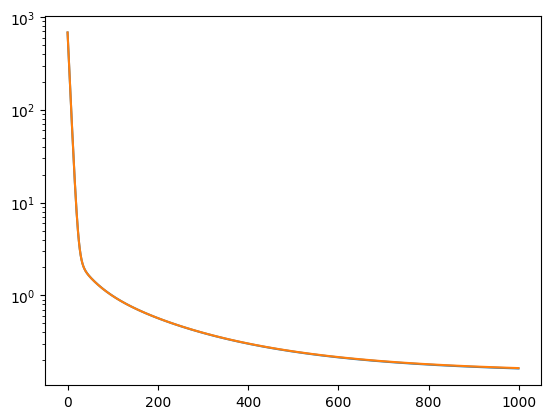

In [30]:
plt.figure(0)
plt.semilogy(loss_mse_gd)
plt.semilogy(loss_test_set)
plt.show()

In [111]:
y_pred = tX_train_test.dot(w_mse_gd[-1])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))
print("F1 score: ", f1)


Accuracy:  0.8680631037880557
F1 score:  0.11981566820276497


In [18]:
#h.create_csv_submission(test_ids, y_test_rounded, 'submission_gd.csv')

In [116]:
#Test the model on the test sample. Do we need to standardize ?

y_test = tX_test.dot(w_mse_gd[-1])
y_test_rounded = np.where(y_test > 0, 1, -1) #not sure about this line

print('weights = \n\n', w_mse_gd[-1],'\n\n Loss = ', loss_mse_gd[-1],'\n\n*****************************************************************************',
      ' \n\n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded == 1)/len(y_test_rounded))

weights = 

 [ 0.22422365 -0.19710027  0.01173442 -0.00087104  0.56386246  0.27254812
 -0.01120641  0.07727796 -0.2958502   0.04947018 -0.22956108 -0.04138959
  0.09573553  0.07824979 -0.03784105  0.42959655 -0.00787782  0.76234186
  0.15607555  0.10708325  0.25915261  0.25050162] 

 Loss =  0.24858977469312366 

*****************************************************************************  

 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.06141032556523647


Lets run some cross validation to see the best initial weights (as a function of the proportion of 1, -1 and 0)


2. MSE SGD

In [36]:
w_mse_sgd, loss_mse_sgd = f.mean_squared_error_sgd(y_train, tX_train, initial_w, 1000, 0.0001)

SGD iter. 999/999: loss=7.225745745335998, w0=0.7189267874835554, w1=0.2861934697992262


In [37]:
def plotLossMSE(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_mse(y, x, w))

    plt.figure(0)
    plt.semilogy(loss)
    plt.semilogy(loss_test_set)
    plt.show()


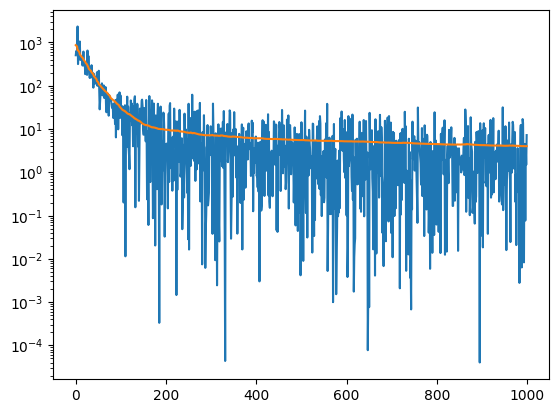

In [38]:
plotLossMSE(w_mse_sgd, loss_mse_sgd, y_train_test, tX_train_test)

In [46]:
y_pred = tX_train_test.dot(w_mse_sgd[-1])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.4936865736837293
F1 score:  0.06319073753853094


In [45]:
y_test_sgd = tX_test.dot(w_mse_sgd[-1])
y_test_rounded_sgd = np.where(y_test_sgd > 0, 1, -1)

print('weights = \n', w_mse_sgd[-1],'\n Loss = ', loss_mse_sgd[-1],'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded_sgd == 1)/len(y_test_rounded_sgd))

weights = 
 [ 0.71892679  0.28619347 -0.00501352 -0.07726252  0.9599493   0.76485884
  0.79488354  0.72289058  0.49054139  0.81896287 -0.34777157 -0.49841973
  0.7523915   0.80842508  0.77441545  0.78392759 -0.51470911  0.9223694
  0.73140725  0.85876432  0.9273481   0.92352776] 
 Loss =  7.225745745335998 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.45282915367666554


3. Least squares

In [53]:
w_ls, loss_ls = f.least_squares(y_train, tX_train)

In [226]:
y_pred = tX_train_test.dot(w_ls)
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.9067035487315954
F1 score:  0.04651994990159242


In [55]:

y_test_ls = tX_test.dot(w_ls)
y_test_ls = np.where(y_test_ls > 0, 1, -1)

print('weights = \n', w_ls,'\n Loss = ', loss_ls,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ls == 1)/len(y_test_ls))

weights = 
 [-3.56101104e-01  5.74396708e-02  2.26651131e-03 -2.17063114e-04
 -3.02761533e-02 -7.33762684e-03 -9.04431916e-02 -3.74132962e-01
 -4.82598963e-02 -9.90395178e-02 -1.69028700e-03 -5.60240584e-03
 -9.93472006e-02 -4.22232783e-02 -7.38677250e-02  3.63755048e-02
  1.71959745e-02 -2.22558058e-01  3.23527987e-02 -6.39228664e-03
 -4.69220611e-03 -7.48412076e-03] 
 Loss =  0.13731317795673628 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.002687901699594986


4. Ridge regression

In [62]:
w_ridge, loss_ridge = f.ridge_regression(y_train, tX_train, 0.01)

In [63]:
y_test_ridge = tX_test.dot(w_ridge)
y_test_ridge = np.where(y_test_ridge > 0, 1, -1)

print('weights = \n', w_ridge,'\n Loss = ', loss_ridge,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ridge == 1)/len(y_test_ridge))

weights = 
 [-0.16601266  0.0391845   0.00262514 -0.00060561 -0.04657832 -0.03076275
 -0.09248568 -0.30124959 -0.06110316 -0.09897353 -0.01768843 -0.00966822
 -0.11207717 -0.04410244 -0.080523    0.01857876  0.0155675  -0.07562154
 -0.02572875 -0.01541715 -0.01049847 -0.01446916] 
 Loss =  0.13790402252250836 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.0013165232814342789


5. Logistic regression

In [64]:
y_train_processed_logreg = np.where(y_train == 1, 1, 0)
y_train_train_lg = np.where(y_train == 1, 1, 0)

In [66]:
w_logreg, loss_logreg = f.logistic_regression(y_train_train_lg, tX_train,np.ones(22),500, 0.1)

Gradient Descent(0/499): loss=22.228996654053788, w0=0.9088302070838765, w1=0.774412574698857
Gradient Descent(1/499): loss=9.61084201026568, w0=0.8176604155043729, w1=0.5488251519014856
Gradient Descent(2/499): loss=1.2867255420662551, w0=0.7266421871872321, w1=0.32357539293222454
Gradient Descent(3/499): loss=1.0905883795901203, w0=0.7117199546655477, w1=0.2920885638054991
Gradient Descent(4/499): loss=1.0210100359812195, w0=0.7050808937172566, w1=0.28412765397195483
Gradient Descent(5/499): loss=0.9651652376027849, w0=0.6994507601948652, w1=0.278115964176346
Gradient Descent(6/499): loss=0.9197144055840988, w0=0.6942364853647579, w1=0.2724105456807827
Gradient Descent(7/499): loss=0.8819968488611999, w0=0.6892588720382995, w1=0.26657257268688056
Gradient Descent(8/499): loss=0.8496388889807243, w0=0.6844978206127393, w1=0.26067571485396496
Gradient Descent(9/499): loss=0.8210060145414425, w0=0.6799487327086798, w1=0.25484484750932557
Gradient Descent(10/499): loss=0.7951040217852328

In [241]:
y_pred = tX_train_test.dot(w_logreg)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.where(y_pred == 1, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.9054255151525762
F1 score:  0.008443465491923641


In [68]:
y_test_logreg = tX_test.dot(w_logreg)
y_test_logreg = np.where(y_test_logreg > 0.5, 1, 0)

print('weights = \n', w_logreg,'\n Loss = ', loss_logreg,'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train== 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_logreg == 1)/len(y_test_logreg))

weights = 
 [ 0.05238217 -0.06640033  0.02116758 -0.00274931  0.49022348  0.18084201
 -0.32492353 -0.32597621 -0.52899741 -0.28392638 -0.42508117 -0.12185999
 -0.17506193 -0.1238589  -0.38367223  0.526824    0.11760777  0.71570066
  0.07131136  0.13223593  0.25722637  0.26169432] 
 Loss =  0.25579577291081107 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.00571407674233628


In [69]:
w_reg_logreg, loss_reg_logreg = f.reg_logistic_regression(y_train_processed_logreg, tX_train, 0.01, initial_w, 100, 0.1)

Gradient Descent(0/99): loss=22.194147963526632, w0=0.9078302070838765, w1=0.7734125746988572
Gradient Descent(1/99): loss=9.553879248884057, w0=0.815752585328088, w1=0.5470517393869585
Gradient Descent(2/99): loss=1.275628811054163, w0=0.7239263887868533, w1=0.3212723314856586
Gradient Descent(3/99): loss=1.0866978531591471, w0=0.7086874934055847, w1=0.2906129836396613
Gradient Descent(4/99): loss=1.0164421060079472, w0=0.70138209336078, w1=0.28243419986045
Gradient Descent(5/99): loss=0.9599804311227546, w0=0.6950858445218292, w1=0.2762006208844834
Gradient Descent(6/99): loss=0.9139561901309793, w0=0.6892038677378615, w1=0.27026134063383106
Gradient Descent(7/99): loss=0.8756876908497888, w0=0.6835594191296854, w1=0.26418521230851383
Gradient Descent(8/99): loss=0.8427952517628434, w0=0.6781341712395589, w1=0.25805240609881636
Gradient Descent(9/99): loss=0.8136485893783099, w0=0.6729235495850487, w1=0.25198839440245785
Gradient Descent(10/99): loss=0.7872596314963121, w0=0.66790044

In [71]:
y_test_reg_logreg = tX_test.dot(w_reg_logreg)
y_test_reg_logreg = np.where(y_test_reg_logreg > 0.5, 1, 0)

print('weights = \n', w_reg_logreg,'\n Loss = ', loss_reg_logreg,'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_reg_logreg == 1)/len(y_test_reg_logreg))


weights = 
 [ 0.38466513 -0.11868254  0.03348657 -0.02180457  0.70951366  0.47367152
  0.32920329  0.29529946 -0.24753073  0.41312117 -0.88487795 -0.42905013
  0.33098771  0.4264872   0.25716685  0.62096664  0.05302878  0.75844239
  0.40304051  0.55241231  0.64394116  0.65871171] 
 Loss =  0.3688747847169664 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.027372713226487717


In [119]:
y_sub = np.where(y_test_reg_logreg == 1, 1, -1)
h.create_csv_submission(test_ids, y_sub, 'submission_reg_logreg2.csv')